# Imports

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns

# Loading data.

In [2]:
MOVIE_DIRECTOR_FILE = 'movie-director.csv'
MOVIE_REVENUE_FILE  = 'movies-revenue-classification.csv'
MOVIE_ACTOR_FILE    = 'movie-voice-actors.csv'

# Loading 

In [3]:
TRAIN_DIR = r'train'
TEST_DIR  = r'test'

In [4]:
from loading_data import load_data

TRAIN_MOVIE_DIRECTOR_FILE = 'movie-director.csv'
TRAIN_MOVIE_REVENUE_FILE  = 'movies-revenue-classification.csv'
TRAIN_MOVIE_ACTOR_FILE    = 'movie-voice-actors.csv'

TEST_MOVIE_DIRECTOR_FILE = 'movie-director-test-samples.csv'
TEST_MOVIE_REVENUE_FILE  = 'movies-revenue-test-samples.csv'
TEST_MOVIE_ACTOR_FILE    = 'movie-voice-actors-test-samples.csv'


TRAIN_MOVIE_DIRECTOR_FILE = os.path.join(TRAIN_DIR, TRAIN_MOVIE_DIRECTOR_FILE)
TRAIN_MOVIE_REVENUE_FILE  = os.path.join(TRAIN_DIR, TRAIN_MOVIE_REVENUE_FILE)
TRAIN_MOVIE_ACTOR_FILE    = os.path.join(TRAIN_DIR, TRAIN_MOVIE_ACTOR_FILE)

TEST_MOVIE_DIRECTOR_FILE  = os.path.join(TEST_DIR, TEST_MOVIE_DIRECTOR_FILE)
TEST_MOVIE_REVENUE_FILE   = os.path.join(TEST_DIR, TEST_MOVIE_REVENUE_FILE)
TEST_MOVIE_ACTOR_FILE     = os.path.join(TEST_DIR, TEST_MOVIE_ACTOR_FILE)

train_data = load_data(director_file=TRAIN_MOVIE_DIRECTOR_FILE,
                       actor_file=TRAIN_MOVIE_ACTOR_FILE,
                       revenue_file=TRAIN_MOVIE_REVENUE_FILE)

test_data = load_data(director_file=TEST_MOVIE_DIRECTOR_FILE,
                      actor_file=TEST_MOVIE_ACTOR_FILE,
                      revenue_file=TEST_MOVIE_REVENUE_FILE)

# Preprocessing
* Handling `Genre` with Mode and OneHotEncoder
* Handling `MPAA` with mode
* Handling `Date` with Linear Regression
* Handling `Director` with dropping its column
* Handling `Title` & `Character` with label encoding
* Handling `MoviesSuccessLevel` with linear regression

In [5]:
from preprocessing import Preprocessor

## Train Data

<AxesSubplot:>

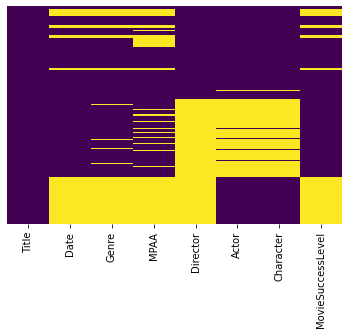

In [6]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
train_data.head()

,Title,Date,Genre,MPAA,Director,Actor,Character,MovieSuccessLevel
0,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Scotty Mattraw,Bashful,S
1,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Roy Atwell,Doc,S
2,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Eddie Collins,Dopey,S
3,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Pinto Colvig,Grumpy,S
4,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Otis Harlan,Happy,S


In [8]:
pp = Preprocessor()
train_data = pp.preprocess(train_data)

<AxesSubplot:>

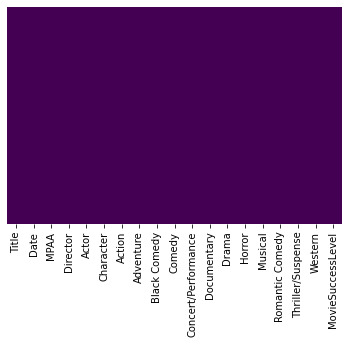

In [9]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Test Data

<AxesSubplot:>

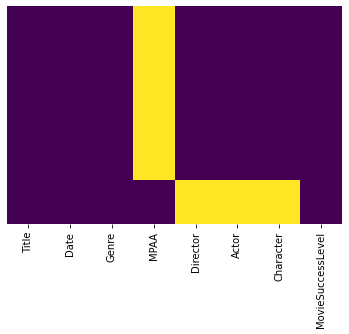

In [10]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
pp = Preprocessor(dataset_type='test')
test_data = pp.preprocess(test_data, train_data)

<AxesSubplot:>

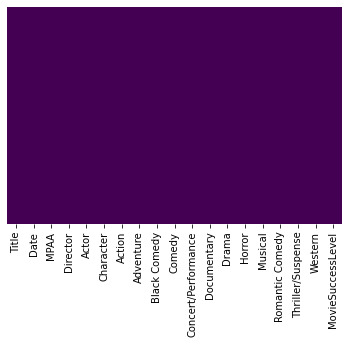

In [12]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
test_data.head()

,Title,Date,MPAA,Director,Actor,Character,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,MovieSuccessLevel
0,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
1,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
2,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
3,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
4,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0


# Building the model (model 1)

In [14]:
from regressors import LinearRegressionModel

In [15]:
lr = LinearRegressionModel(train_data)
lr.train()
lr.predict(test_data)
f"Accuracy: {lr.mean_squared_error()}"

'Accuracy: 0.5396569802794717'

# Building the model (model 2)

## Dropping the the correlated indep columns

<AxesSubplot:>

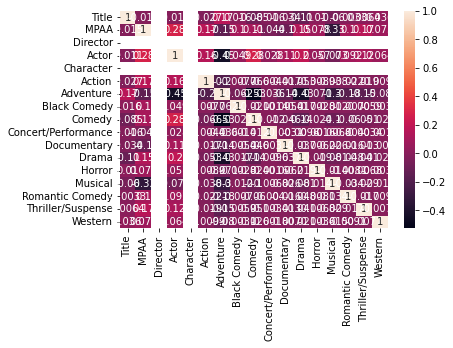

In [16]:
corr = train_data.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True)

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(train_data.iloc[:, :-1].corr(), 0.5)
len(set(corr_features))

4

In [19]:
train_data_low_corr = train_data.drop(corr_features, axis=1)
test_data_low_corr = test_data.drop(corr_features, axis=1)

In [20]:
train_data.head()

,Title,Date,MPAA,Director,Actor,Character,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,MovieSuccessLevel
0,351,2144966400.0,0,0,493,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
1,351,2144966400.0,0,0,477,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
2,351,2144966400.0,0,0,151,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
3,351,2144966400.0,0,0,436,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
4,351,2144966400.0,0,0,404,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4


In [21]:
test_data.head()

,Title,Date,MPAA,Director,Actor,Character,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,MovieSuccessLevel
0,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
1,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
2,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
3,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
4,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0


## Polynomial Regression

In [22]:
from regressors import PolyRegModel

In [23]:
pr = PolyRegModel(train_data_low_corr)
pr.train()
pr.predict(test_data_low_corr)
f"Accuracy: {pr.mean_squared_error()}"

'Accuracy: 0.6817092452692479'

# Final Result

In [24]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

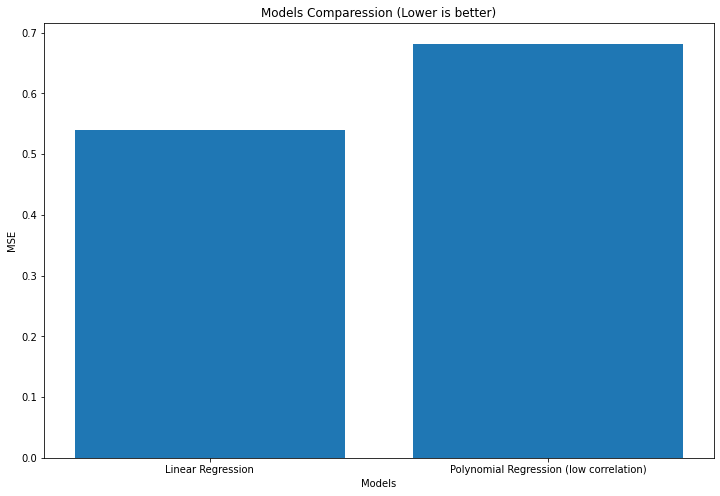

In [25]:
fig = plt.figure(figsize=(12, 8))
plt.title("Models Comparession (Lower is better)")
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(np.arange(2), ['Linear Regression', 'Polynomial Regression (low correlation)'])
plt.bar(np.arange(2), [lr.mean_squared_error(), pr.mean_squared_error()])